In [1]:
myfile='Sleep_Efficiency.csv'
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [3]:
duplicados = df.duplicated().sum()
duplicados

0

In [4]:
df.fillna(0, inplace=True)

<Axes: >

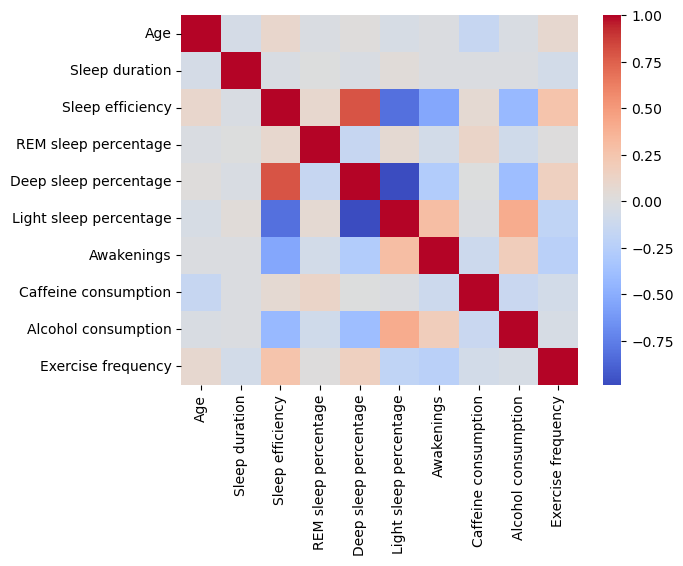

In [5]:
import seaborn as sns
df_numeros = df.select_dtypes(include=['float64', 'int64'])  # Select numerical columns
df_numeros = df_numeros.drop(columns=['ID']) 

sns.heatmap(data=df_numeros.corr(method="pearson"), cmap="coolwarm")

Text(0.5, 1.0, 'Explained Variance for the Dataset')

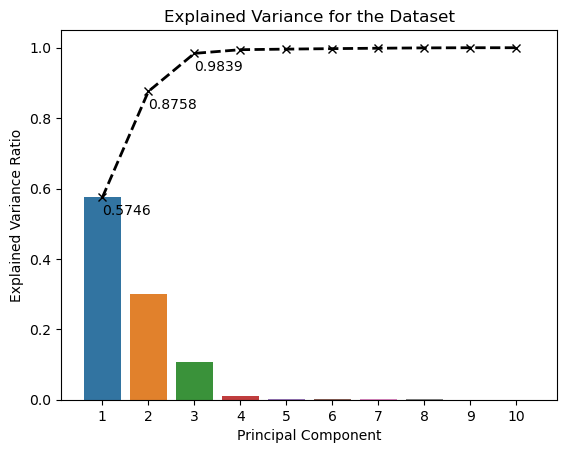

In [6]:
#edited from Lab10 Solutions
from sklearn.decomposition import PCA
pca = PCA().fit(df_numeros)
comps = pca.components_
ev_ratio = pca.explained_variance_ratio_ 
cumul_ev_ratio = np.cumsum(ev_ratio)
pcs = np.arange(1,len(df_numeros.columns)+1)
loadings = pd.DataFrame(data=comps,columns=[f"PC{pc}" for pc in pcs],index=df_numeros.columns)

fig,ax = plt.subplots(nrows=1,ncols=1)
sns.barplot(x=pcs,y=ev_ratio)
ax.plot(pcs-1,cumul_ev_ratio,ls="--",marker="x",lw=2,c="k")
for pc,cer in zip(pcs,cumul_ev_ratio):
    ax.annotate(f"{cer:.4f}",xy=(pc-1,cer-0.05))
    if cer > 0.98:
        break
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Explained Variance for the Dataset")

In [7]:
#Used ChatGPT. Prompted: having a PCA plot, how do I know which one is the principal component
from sklearn.decomposition import PCA

pca = PCA().fit(df_numeros)
ev_ratio = pca.explained_variance_ratio_
first_component = pca.components_[0]
loadings_df = pd.DataFrame(pca.components_, columns=df_numeros.columns)
first_component_loadings = loadings_df.iloc[0]

significant_features = first_component_loadings.abs().sort_values(ascending=False)
print("Most significant features for the First Principal Component:")
print(significant_features.head())

Most significant features for the First Principal Component:
Caffeine consumption      0.996545
Age                       0.080703
REM sleep percentage      0.015695
Alcohol consumption       0.007611
Light sleep percentage    0.006117
Name: 0, dtype: float64


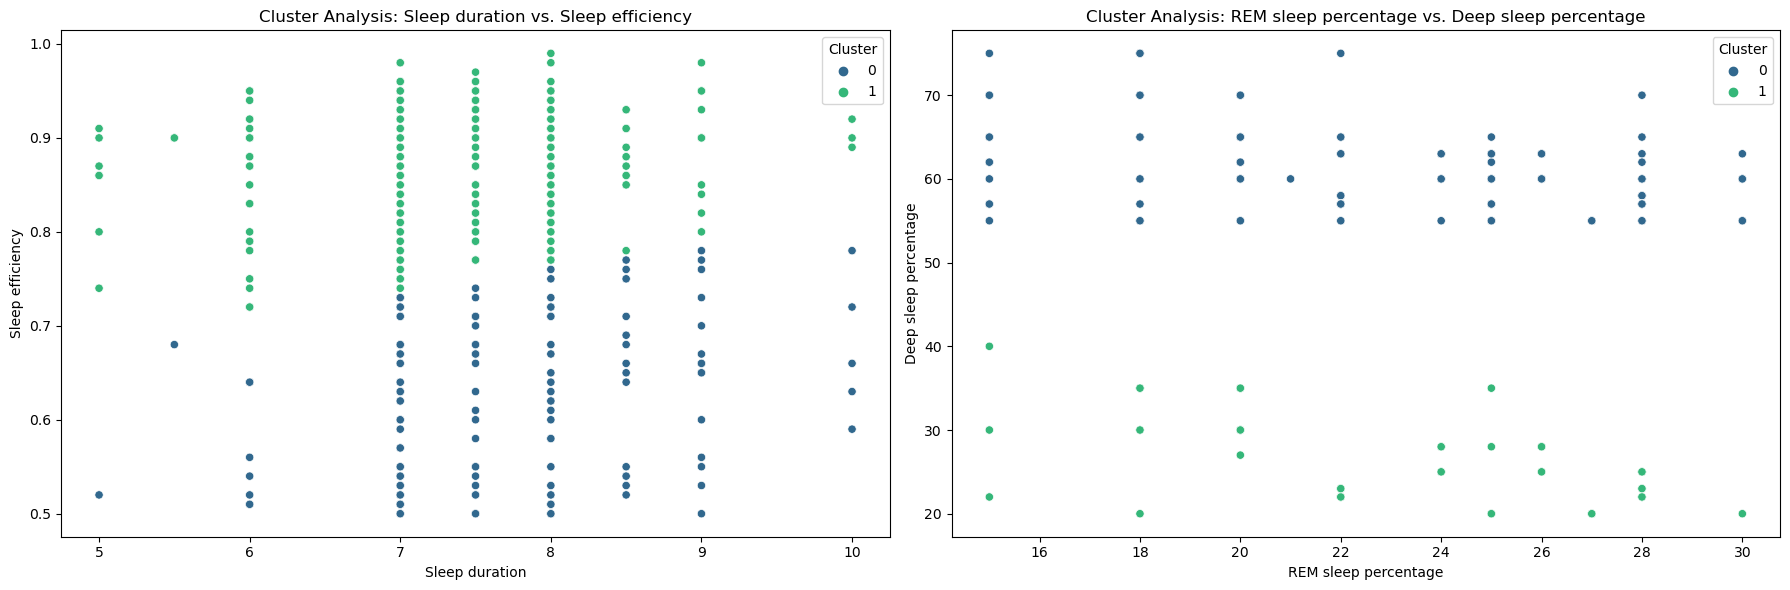

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Example features based on your interest. Replace these with your actual feature names
features_pairs = [('Sleep duration', 'Sleep efficiency'), ('REM sleep percentage', 'Deep sleep percentage')]

n_clusters = 2
fig, axes = plt.subplots(1, len(features_pairs), figsize=(18, 6))

for i, (feature1, feature2) in enumerate(features_pairs):
    # Selecting only the two features for the current plot
    df_pair = df_numeros[[feature1, feature2]].copy()
    
    # Standardizing the selected features
    scaler = StandardScaler()
    df_pair_scaled = scaler.fit_transform(df_pair)
    
    # Applying KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_pair_scaled)
    df_pair['Cluster'] = kmeans.labels_

    # Plotting
    sns.scatterplot(data=df_pair, x=feature1, y=feature2, hue='Cluster', palette='viridis', ax=axes[i])
    axes[i].set_title(f"Cluster Analysis: {feature1} vs. {feature2}")

plt.tight_layout()
plt.show()


In [9]:
df_numeros.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
0,65,6.0,0.88,18,70,10,0.0,0.0,0.0,3.0
1,69,7.0,0.66,24,28,53,3.0,0.0,3.0,3.0
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0
3,40,6.0,0.51,28,25,52,3.0,50.0,5.0,1.0
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0


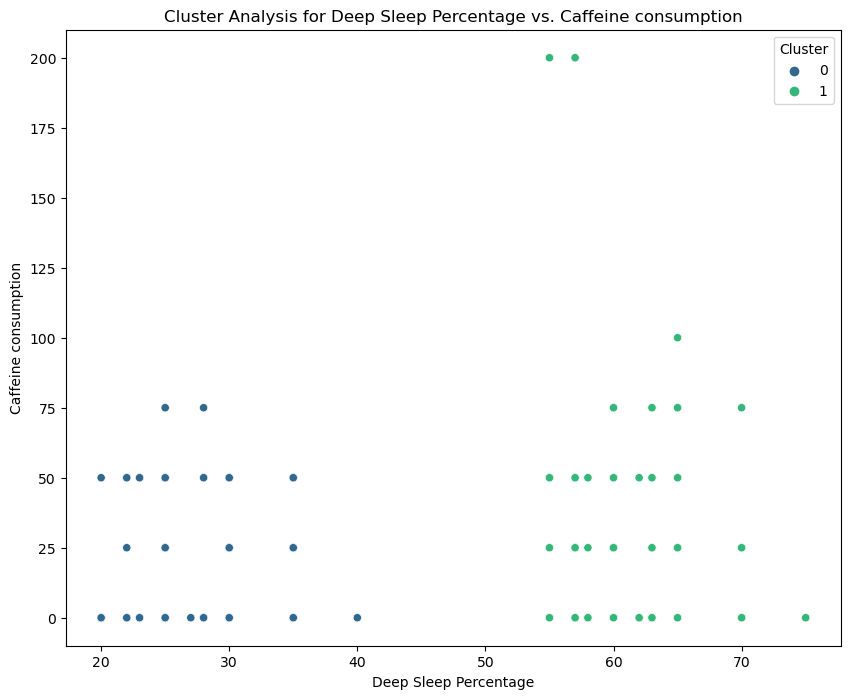

In [10]:
df_selected_features = df[['Deep sleep percentage', 'Caffeine consumption']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='Deep sleep percentage', y='Caffeine consumption', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for Deep Sleep Percentage vs. Caffeine consumption')
plt.xlabel('Deep Sleep Percentage')
plt.ylabel('Caffeine consumption')
plt.legend(title='Cluster', loc='best')
plt.show()

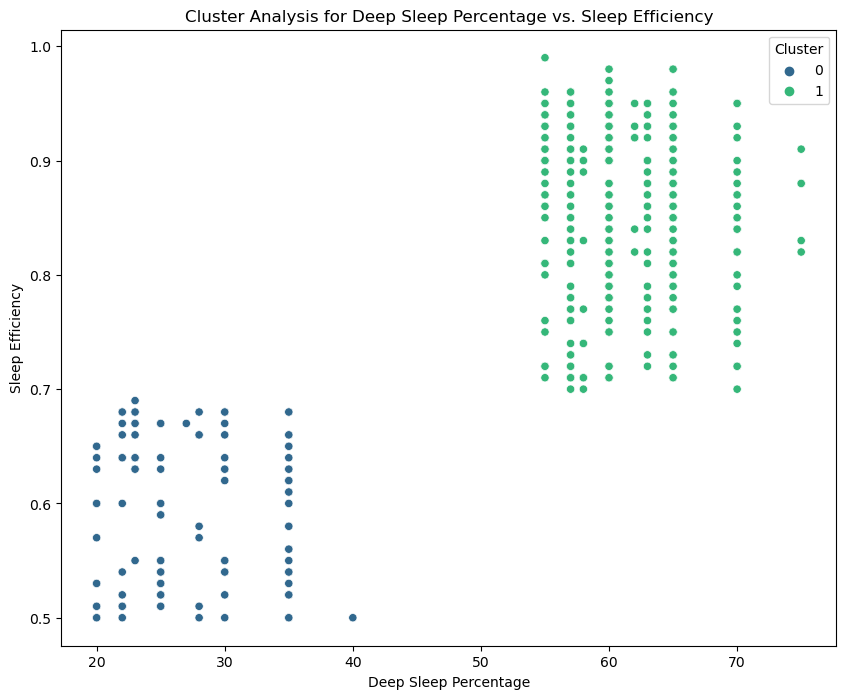

In [11]:
df_selected_features = df[['Deep sleep percentage', 'Sleep efficiency']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='Deep sleep percentage', y='Sleep efficiency', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for Deep Sleep Percentage vs. Sleep Efficiency')
plt.xlabel('Deep Sleep Percentage')
plt.ylabel('Sleep Efficiency')
plt.legend(title='Cluster', loc='best')
plt.show()

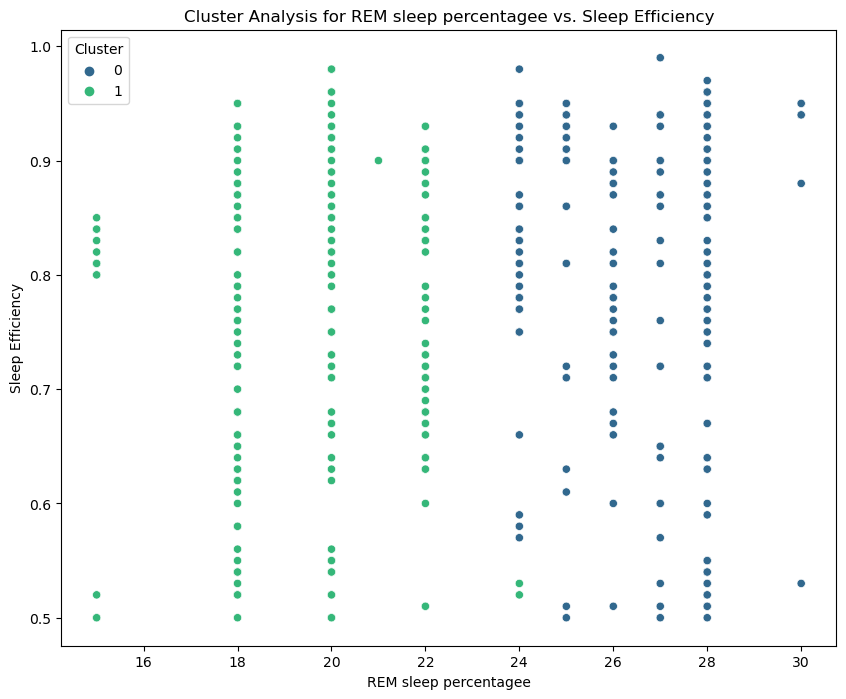

In [12]:
df_selected_features = df[['REM sleep percentage', 'Sleep efficiency']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='REM sleep percentage', y='Sleep efficiency', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for REM sleep percentagee vs. Sleep Efficiency')
plt.xlabel('REM sleep percentagee')
plt.ylabel('Sleep Efficiency')
plt.legend(title='Cluster', loc='best')
plt.show()

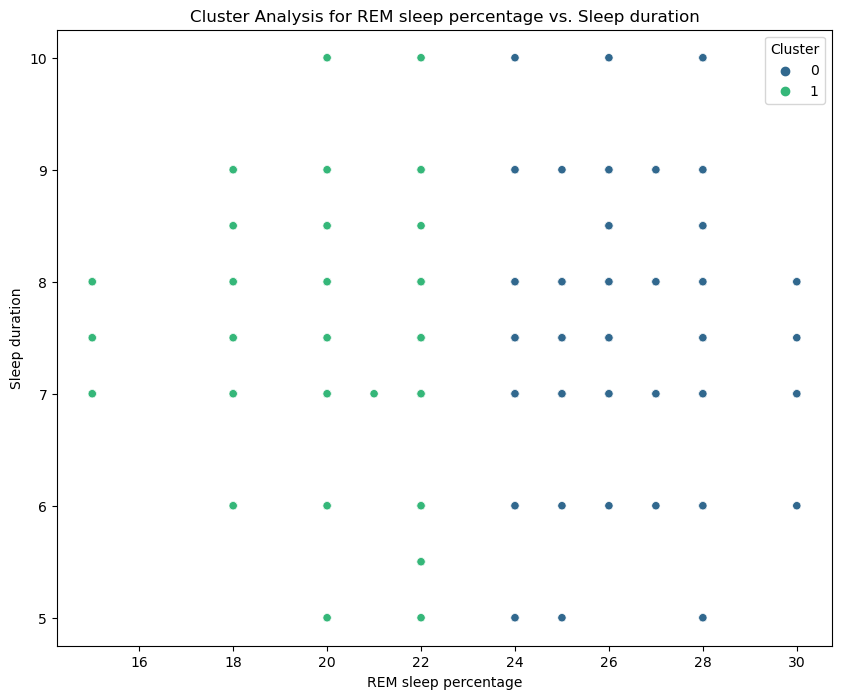

In [13]:
df_selected_features = df[['REM sleep percentage', 'Sleep duration']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='REM sleep percentage', y='Sleep duration', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for REM sleep percentage vs. Sleep duration')
plt.xlabel('REM sleep percentage')
plt.ylabel('Sleep duration')
plt.legend(title='Cluster', loc='best')
plt.show()

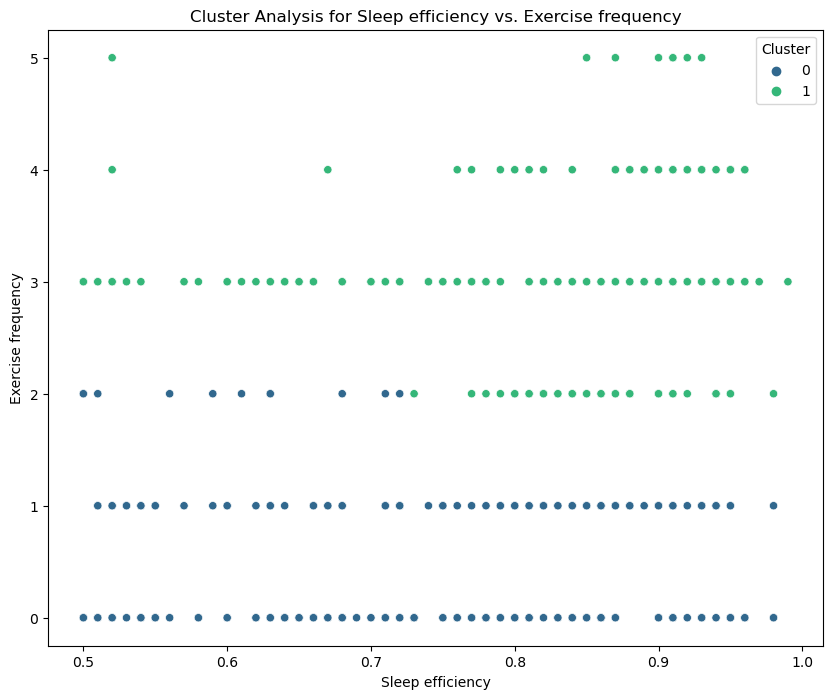

In [14]:
df_selected_features = df[['Sleep efficiency', 'Exercise frequency']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='Sleep efficiency', y='Exercise frequency', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for Sleep efficiency vs. Exercise frequency')
plt.xlabel('Sleep efficiency')
plt.ylabel('Exercise frequency')
plt.legend(title='Cluster', loc='best')
plt.show()

In [15]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sleep efficiency    452 non-null    float64
 1   Exercise frequency  452 non-null    float64
 2   Cluster             452 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.0 KB


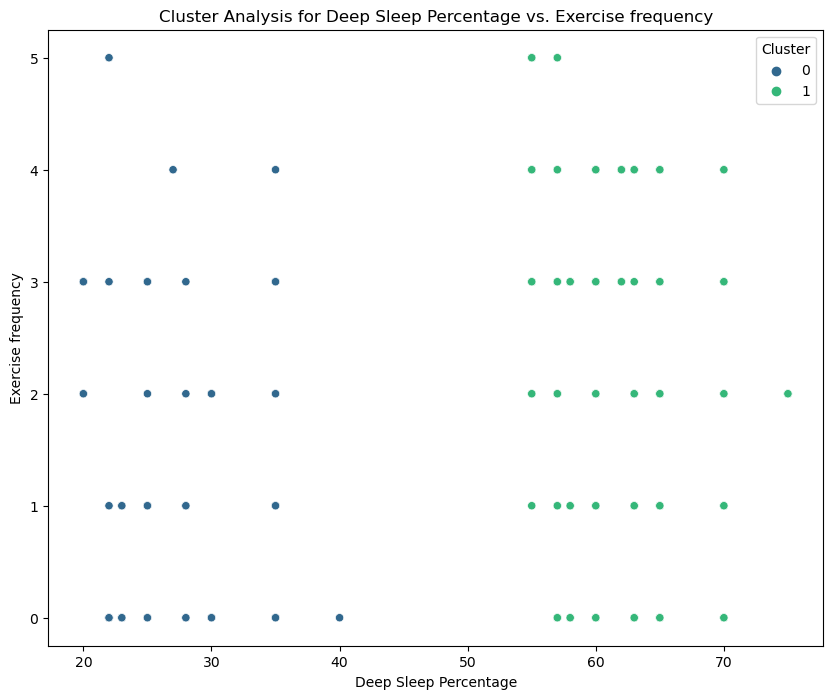

In [16]:
df_selected_features = df[['Deep sleep percentage', 'Exercise frequency']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='Deep sleep percentage', y='Exercise frequency', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for Deep Sleep Percentage vs. Exercise frequency')
plt.xlabel('Deep Sleep Percentage')
plt.ylabel('Exercise frequency')
plt.legend(title='Cluster', loc='best')
plt.show()


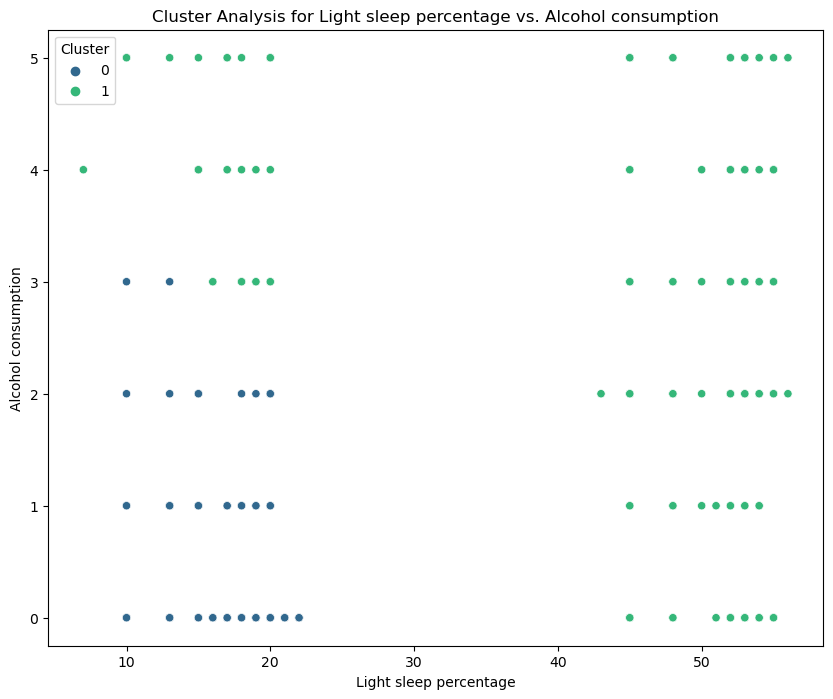

In [17]:
df_selected_features = df[['Light sleep percentage', 'Alcohol consumption']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='Light sleep percentage', y='Alcohol consumption', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for Light sleep percentage vs. Alcohol consumption')
plt.xlabel('Light sleep percentage')
plt.ylabel('Alcohol consumption')
plt.legend(title='Cluster', loc='best')
plt.show()



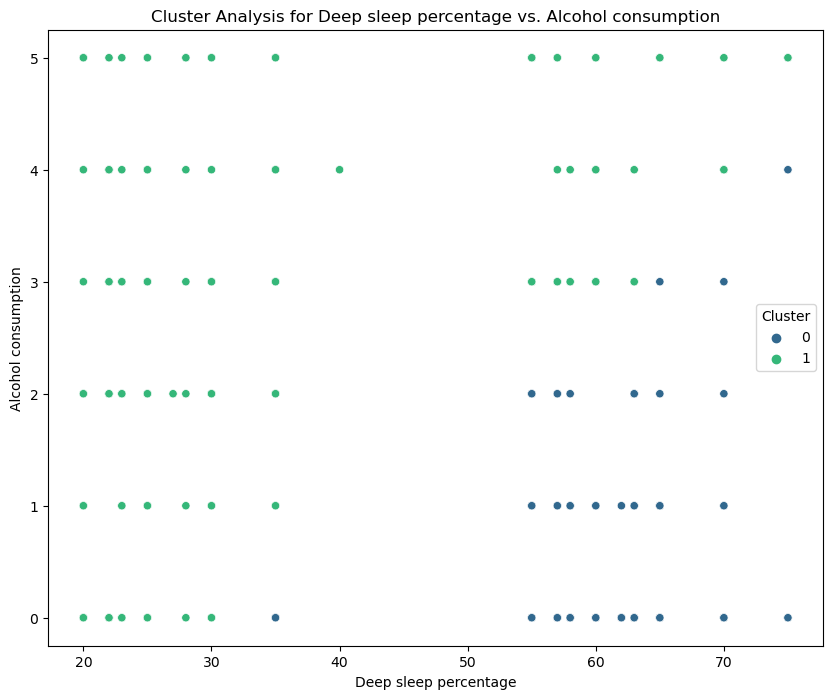

In [18]:
df_selected_features = df[['Deep sleep percentage', 'Alcohol consumption']]

# Standardizing the data
scaler = StandardScaler()
df_selected_features_scaled = scaler.fit_transform(df_selected_features)

# Applying KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected_features['Cluster'] = kmeans.fit_predict(df_selected_features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_selected_features, x='Deep sleep percentage', y='Alcohol consumption', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis for Deep sleep percentage vs. Alcohol consumption')
plt.xlabel('Deep sleep percentage')
plt.ylabel('Alcohol consumption')
plt.legend(title='Cluster', loc='best')
plt.show()

